# Fuel assembly study: 2B 1 family vs 7 families

## Import modules

In [1]:
import sys
import os
import pathlib

from OpenMC_h5_reader import *

import numpy as np
import matplotlib.pyplot as plt


In [2]:
directory = []
xs_dict = {} 
for filename in [name for name in os.listdir(".") if os.path.isdir(os.path.join(".", name)) ]:
    if filename != "__pycache__" and filename !=".ipynb_checkpoints":
        directory.append(filename)

FAMILY: mgxs_casl_2b_1fam

ENERGY GROUP: mgxs_2b_one_eighth_CASMO-70.h5


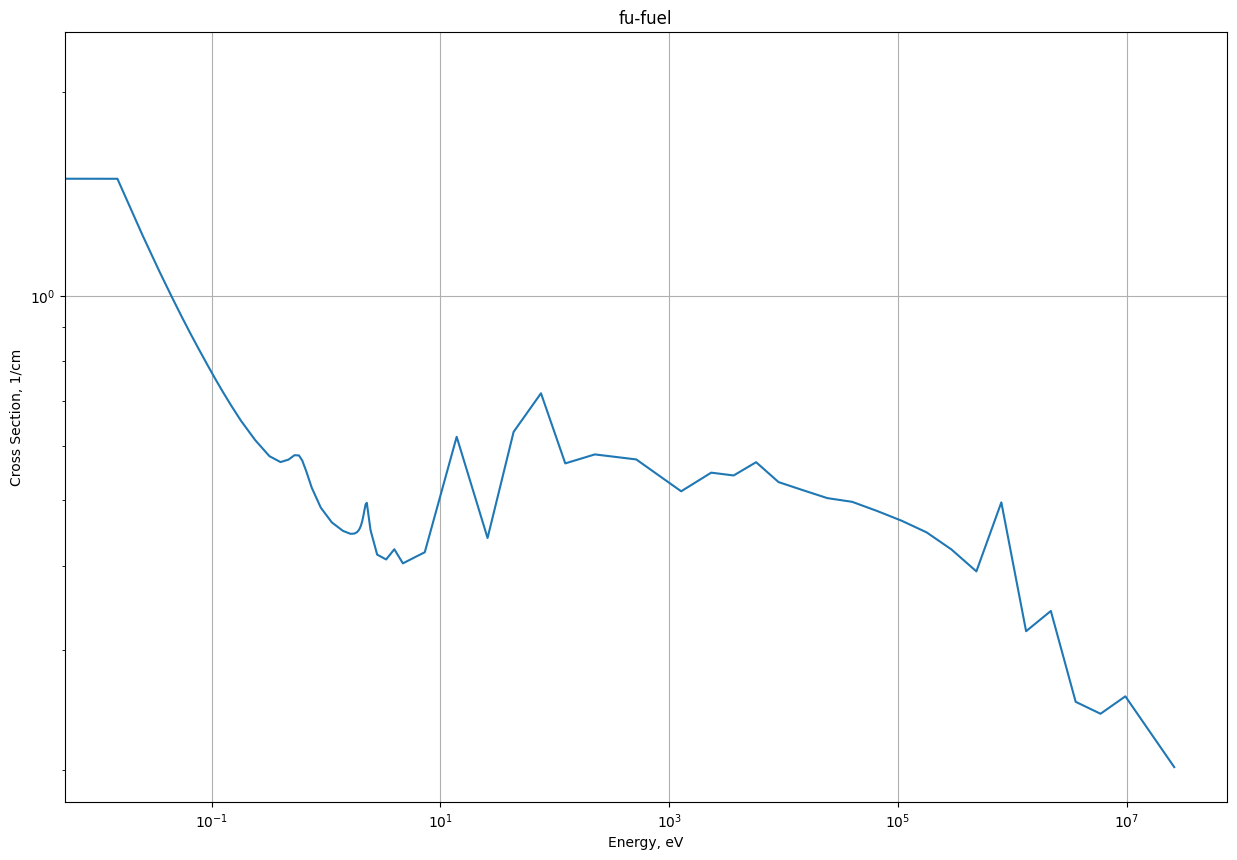

ENERGY GROUP: mgxs_2b_one_eighth_CASMO-16.h5


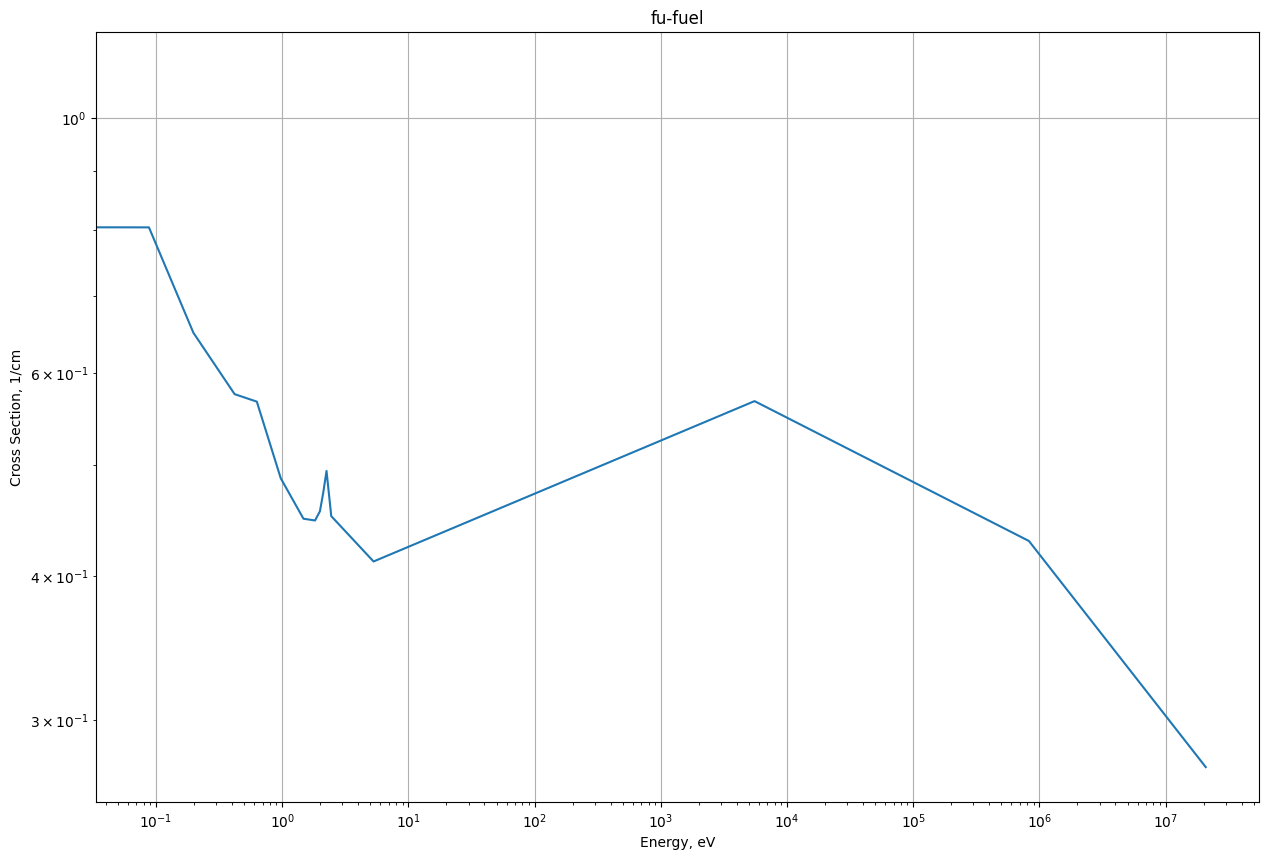

ENERGY GROUP: mgxs_2b_one_eighth_XMAS-172.h5


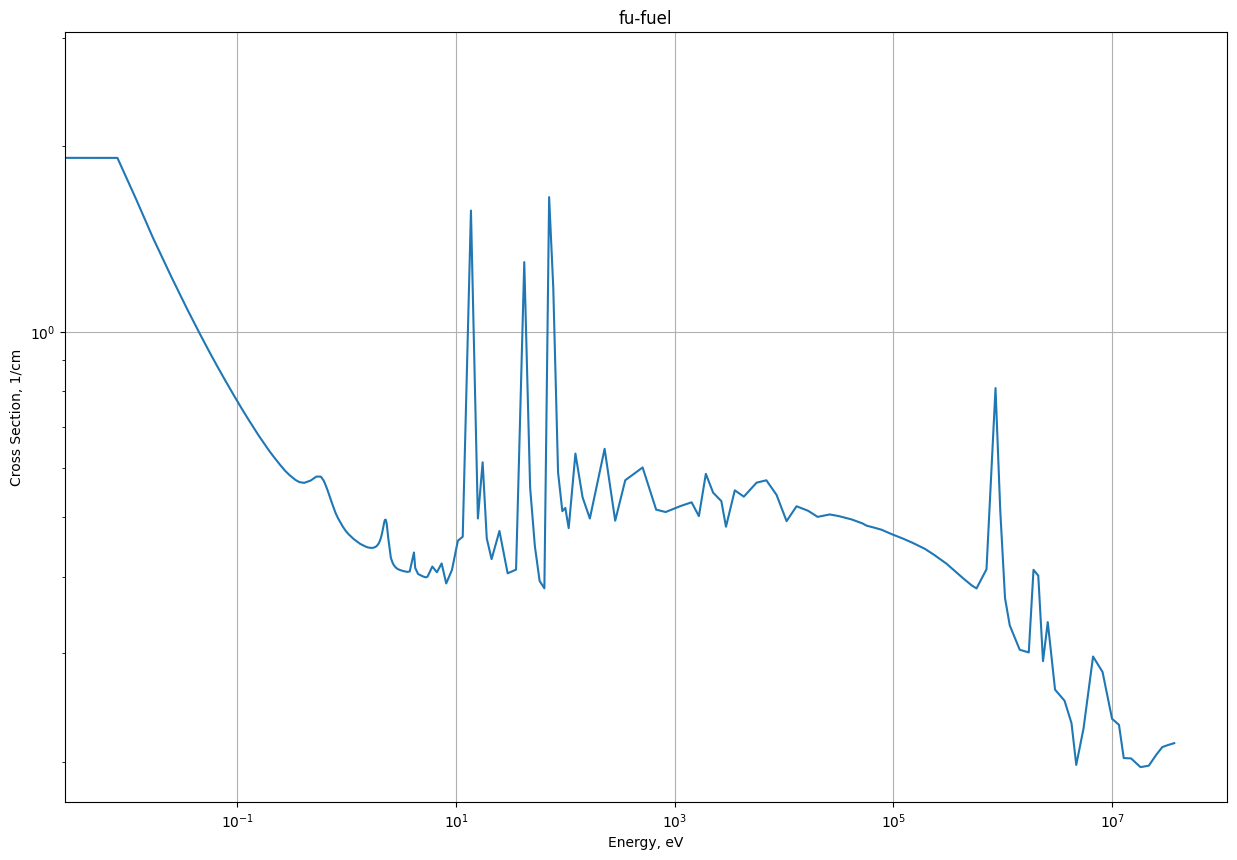

ENERGY GROUP: mgxs_2b_one_eighth_SHEM-361.h5


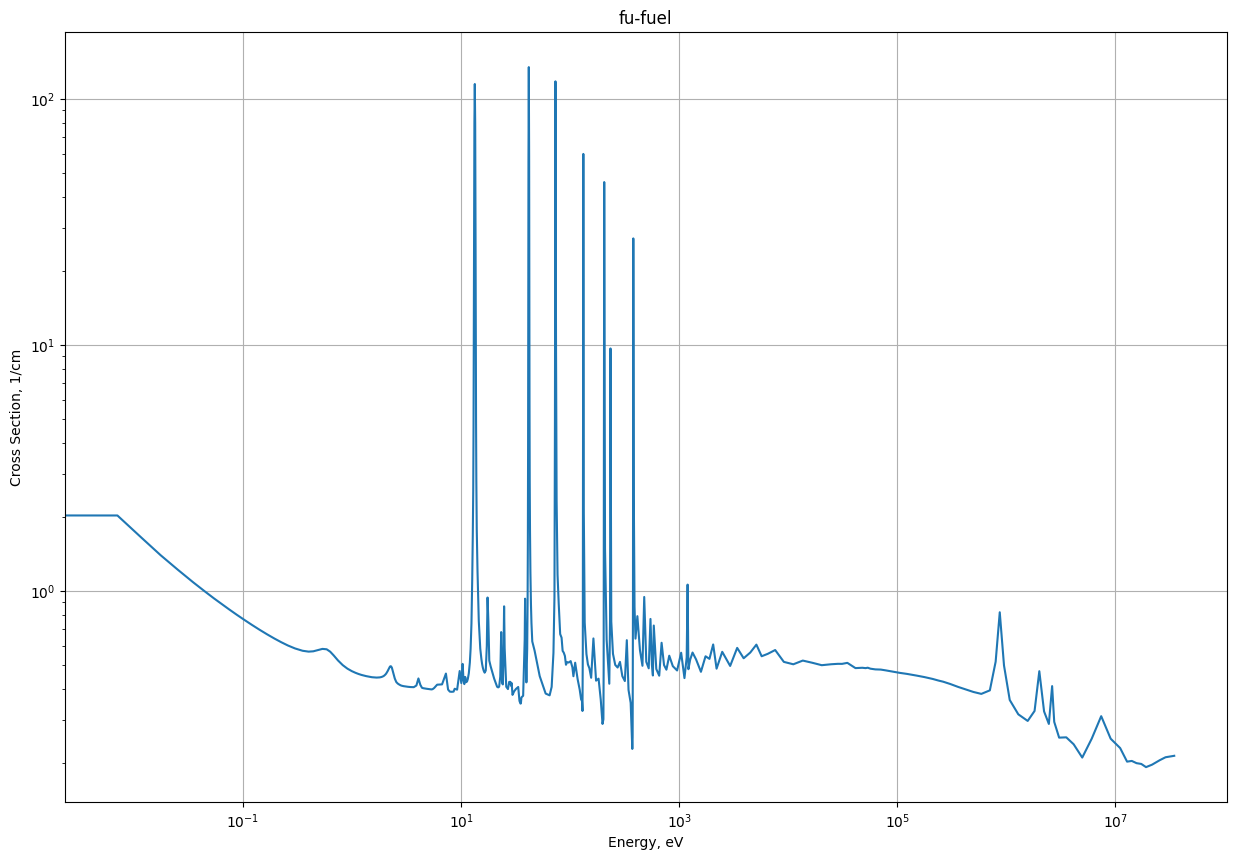

FAMILY: mgxs_casl_2b_7fam

ENERGY GROUP: mgxs_2b_one_eighth_CASMO-70.h5


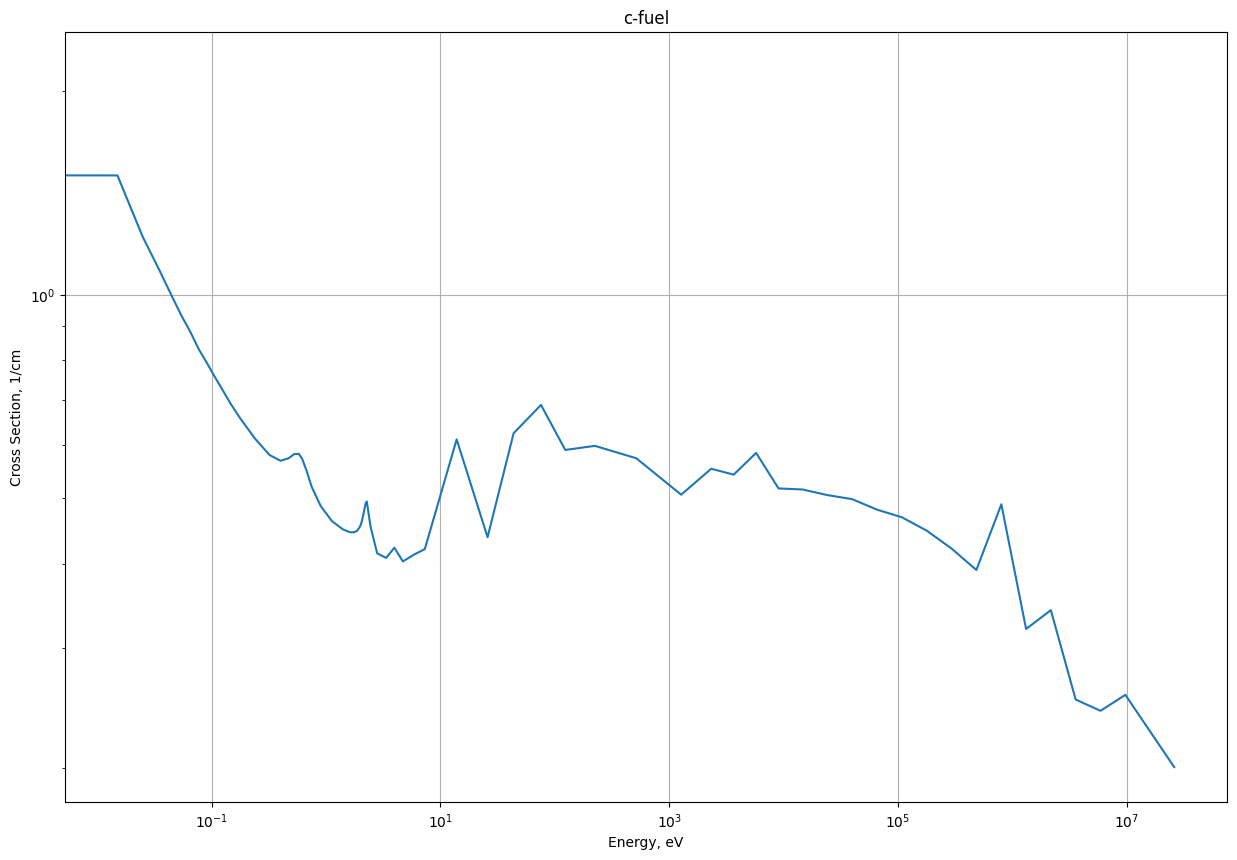

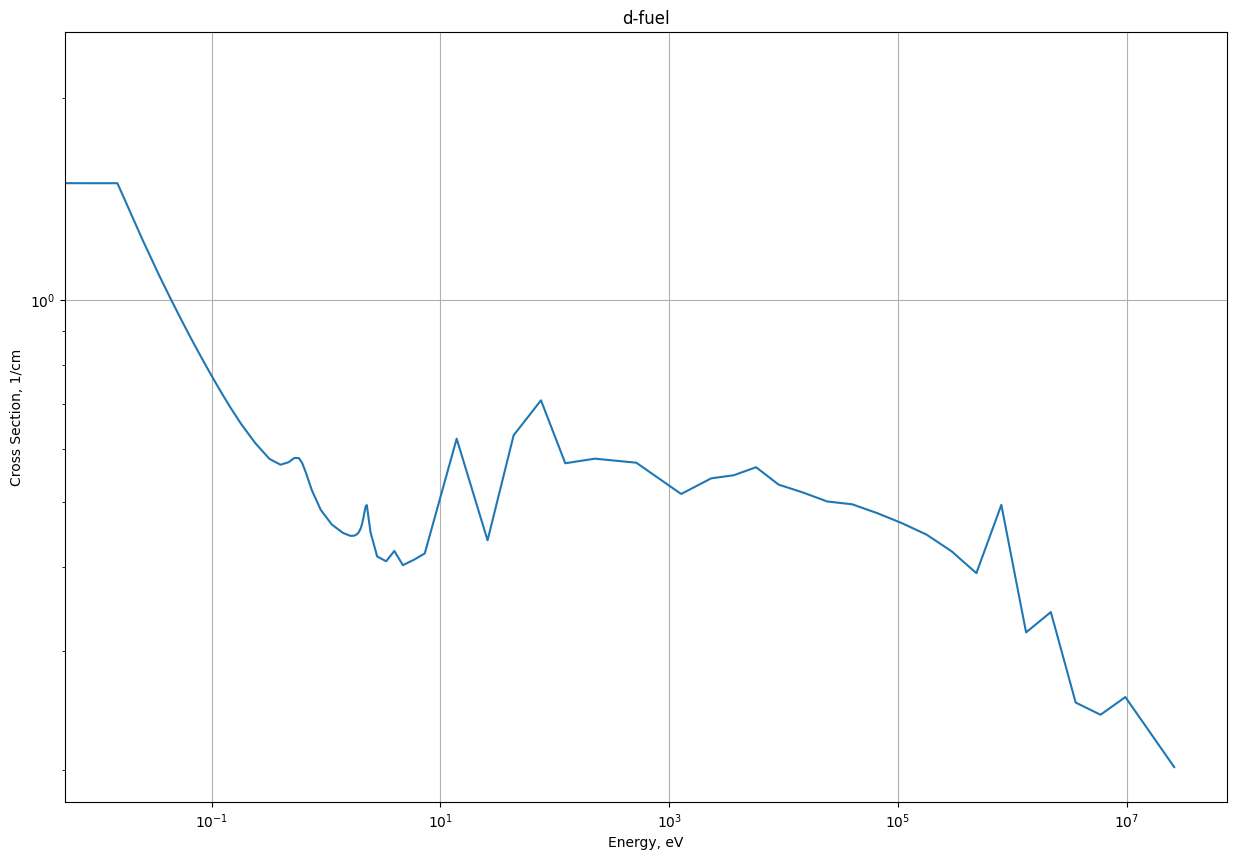

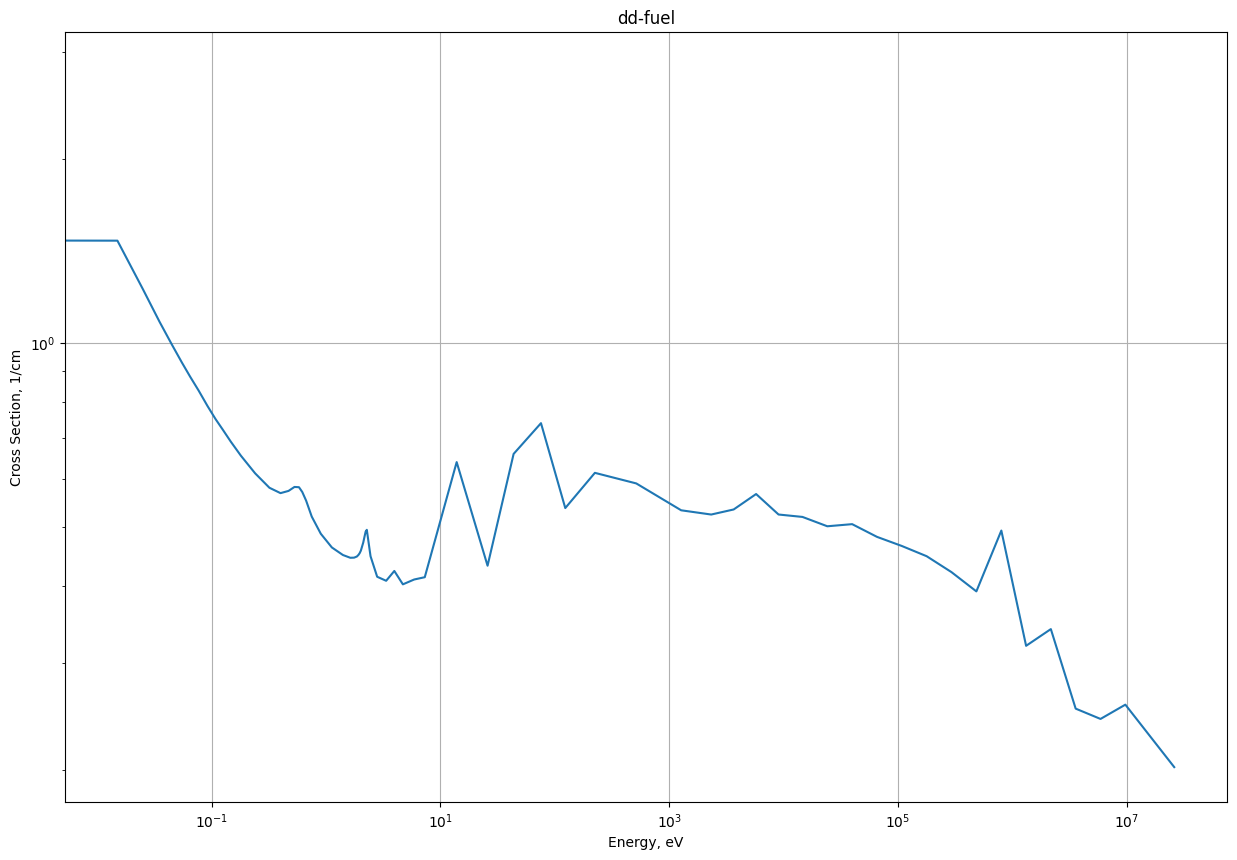

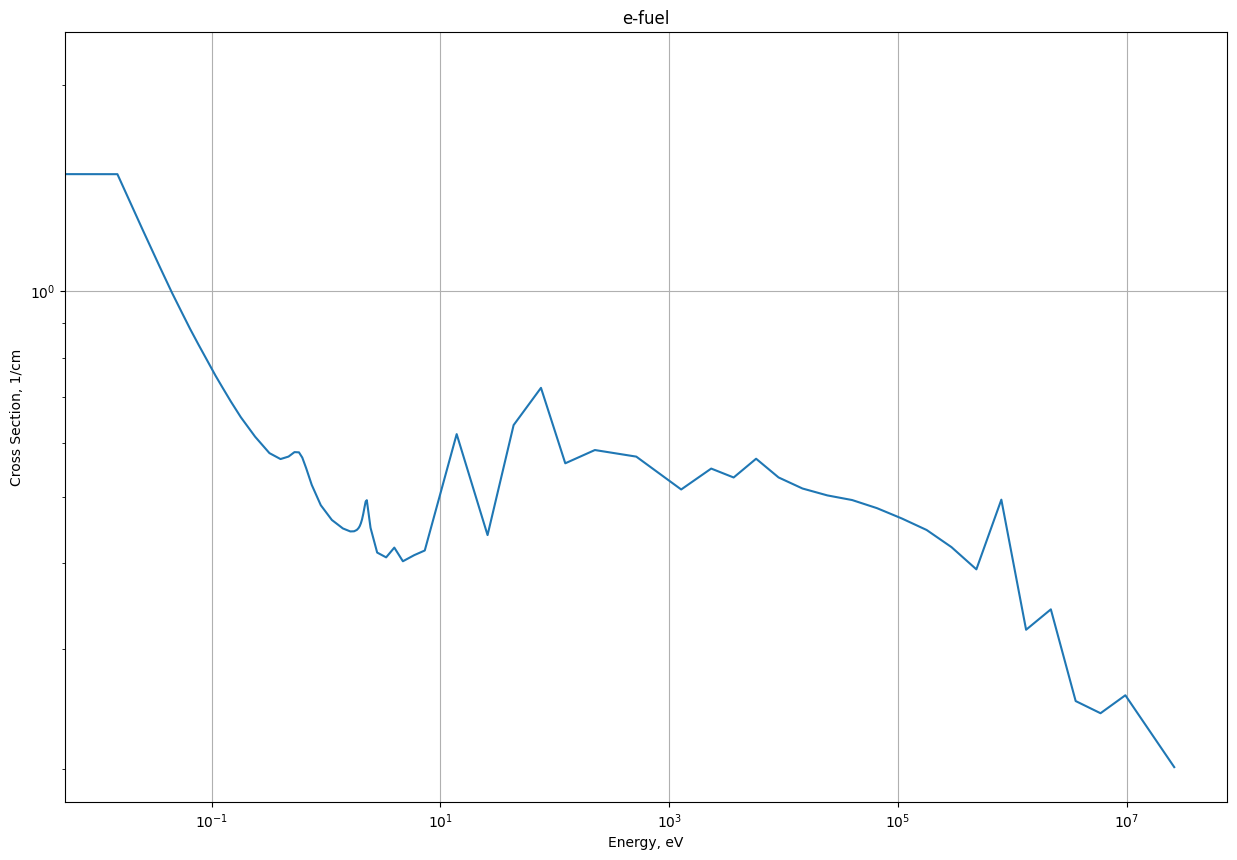

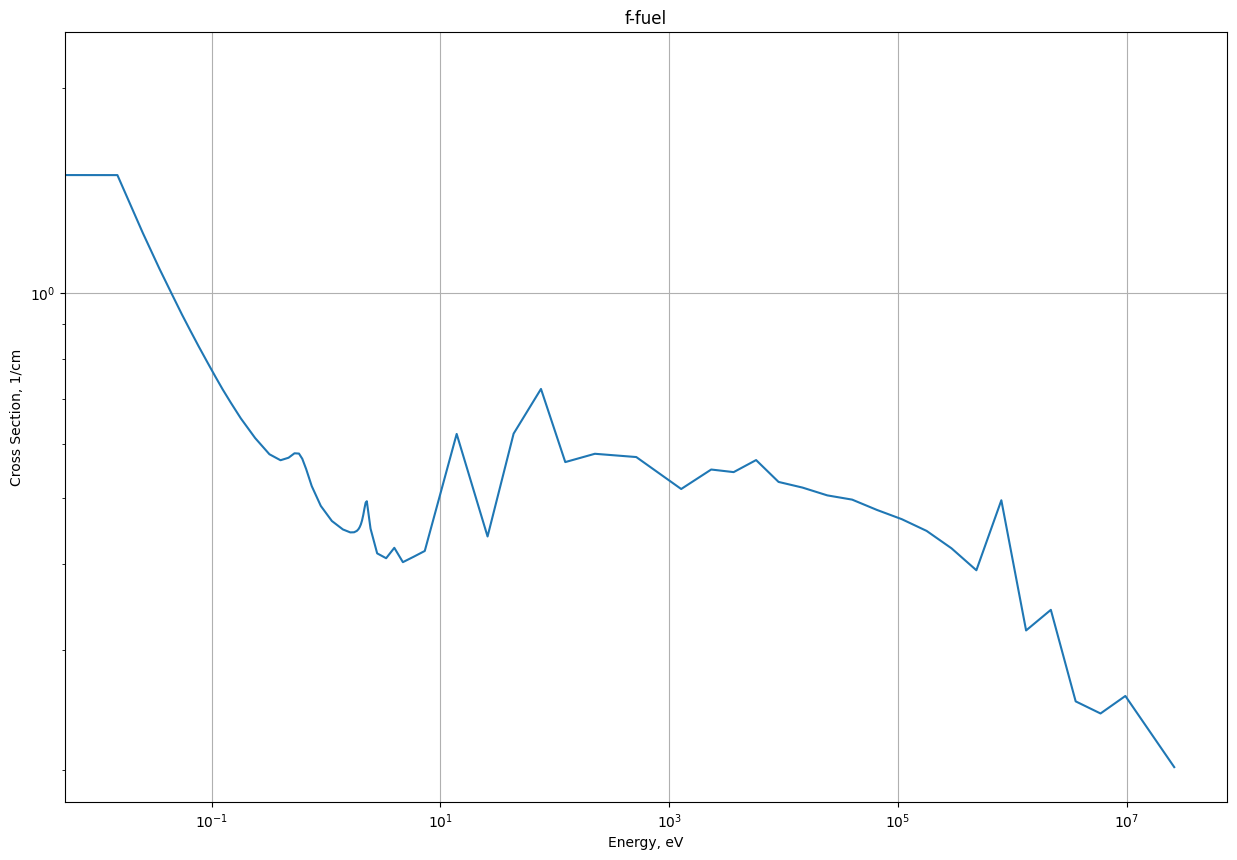

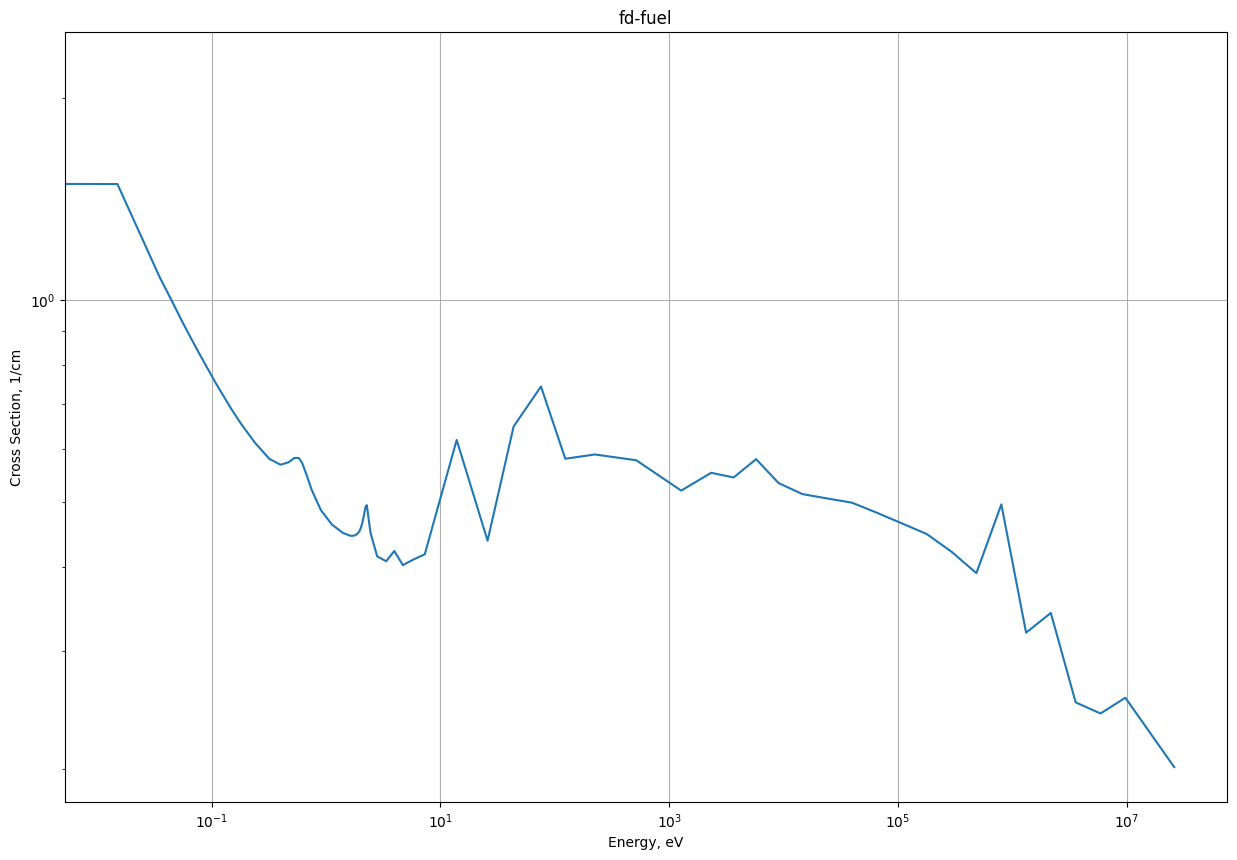

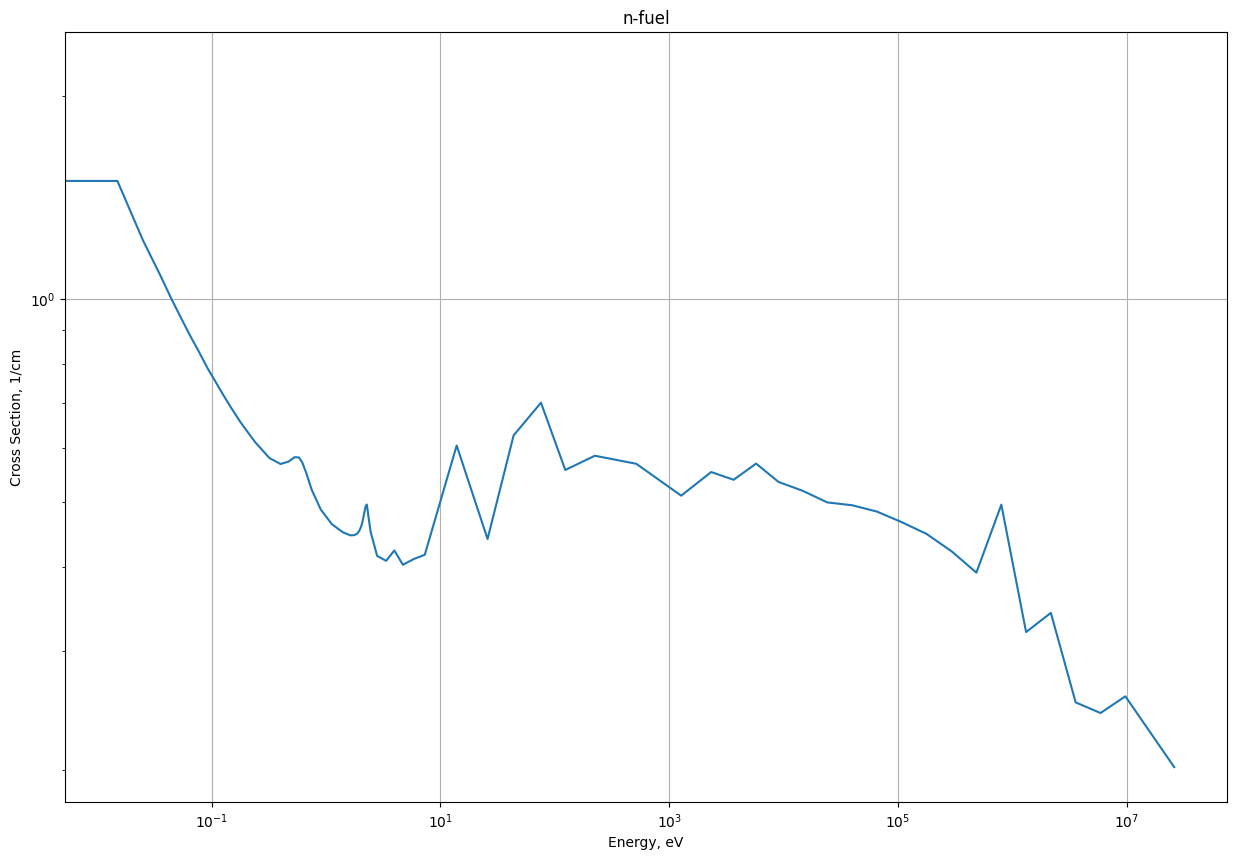

ENERGY GROUP: mgxs_2b_one_eighth_CASMO-16.h5


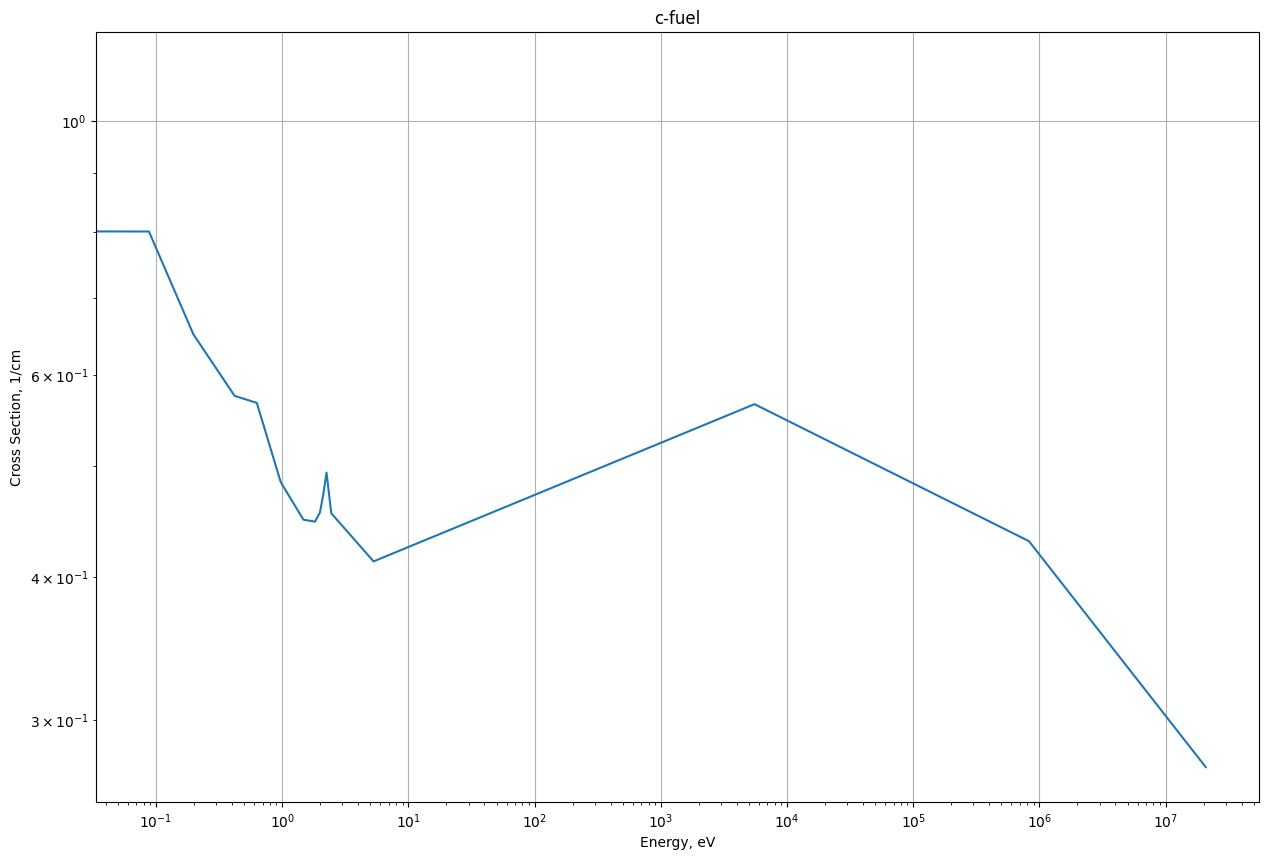

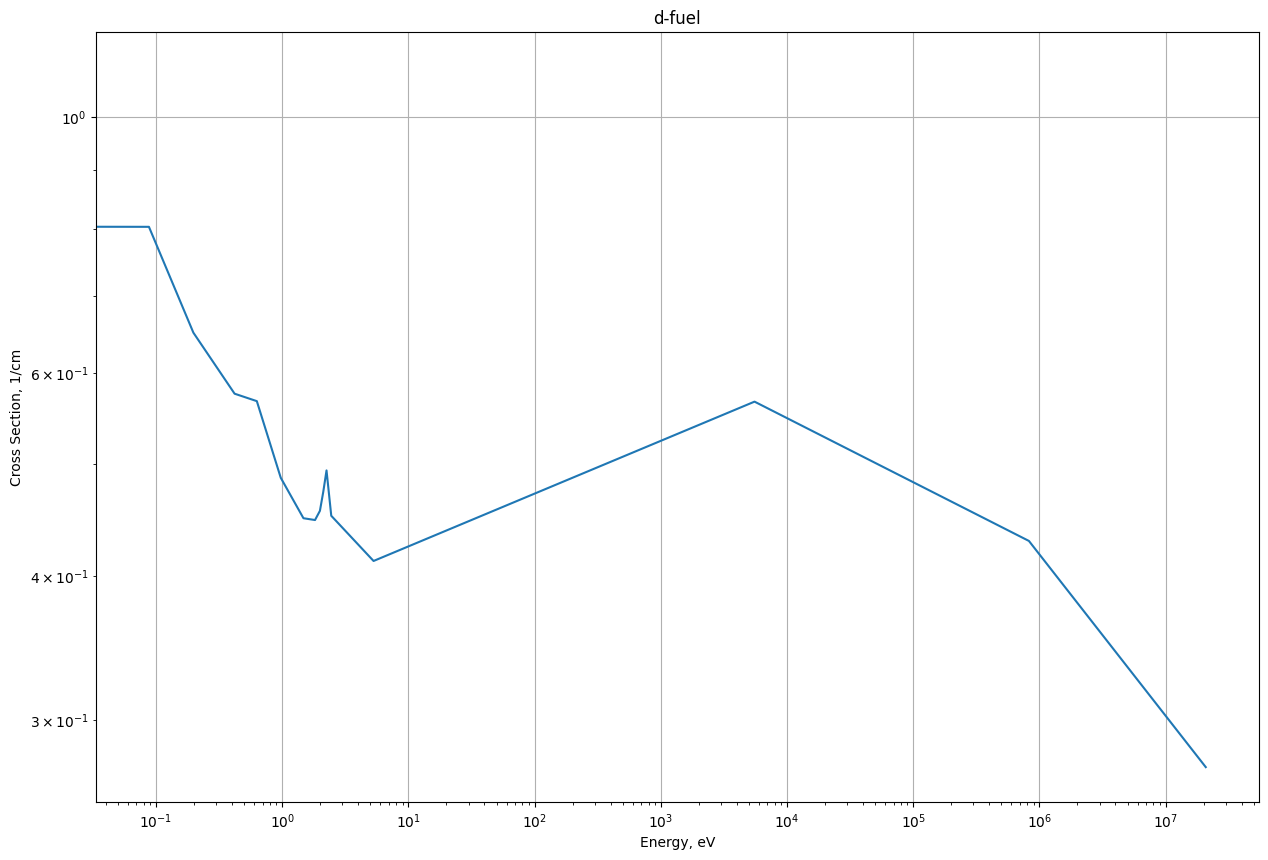

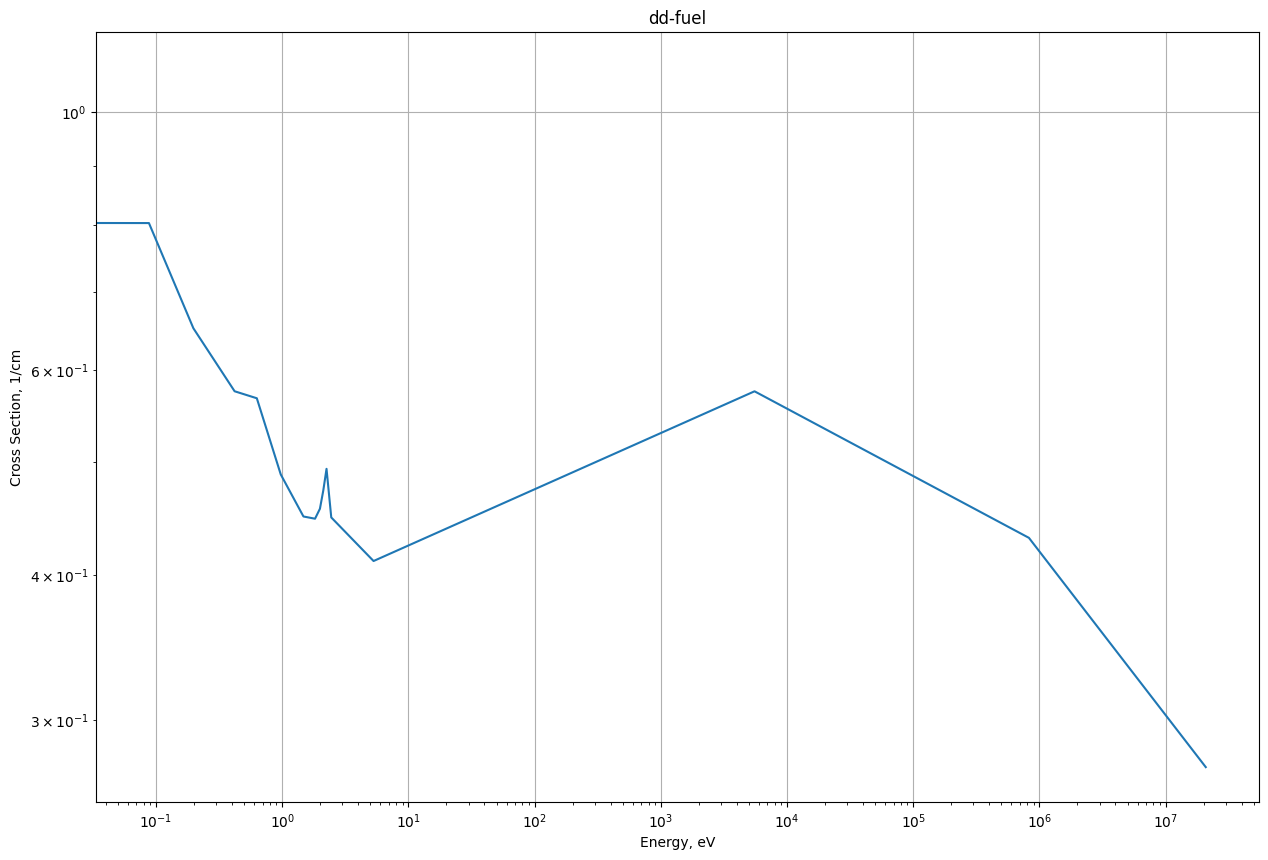

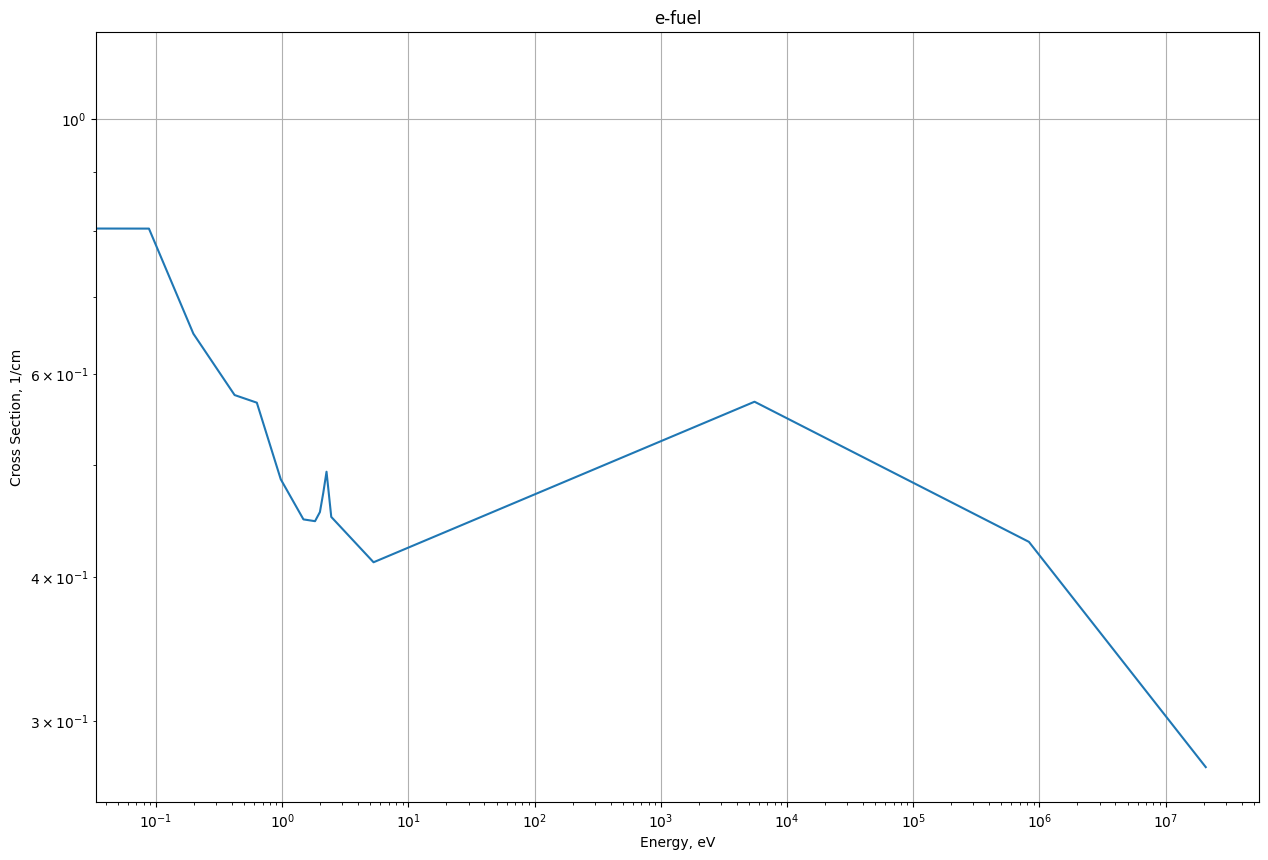

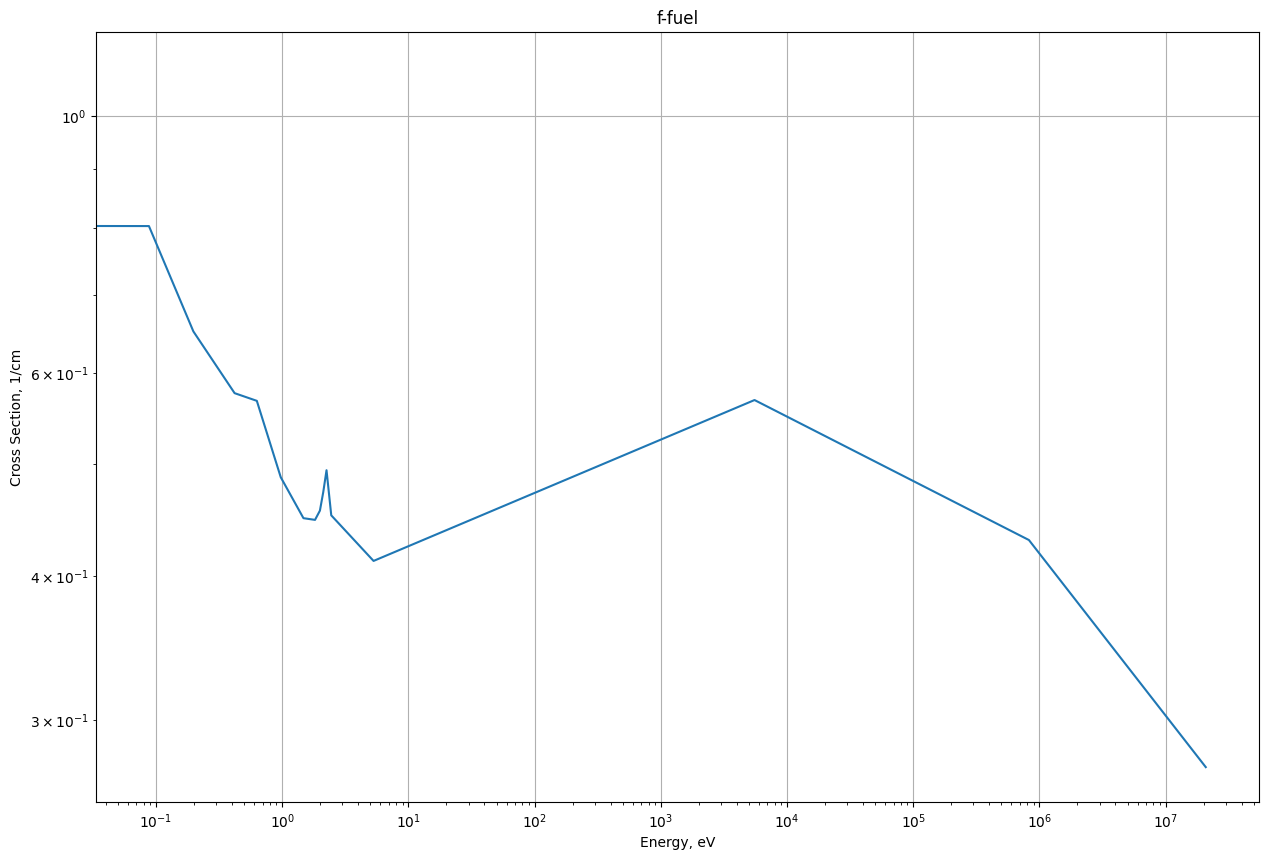

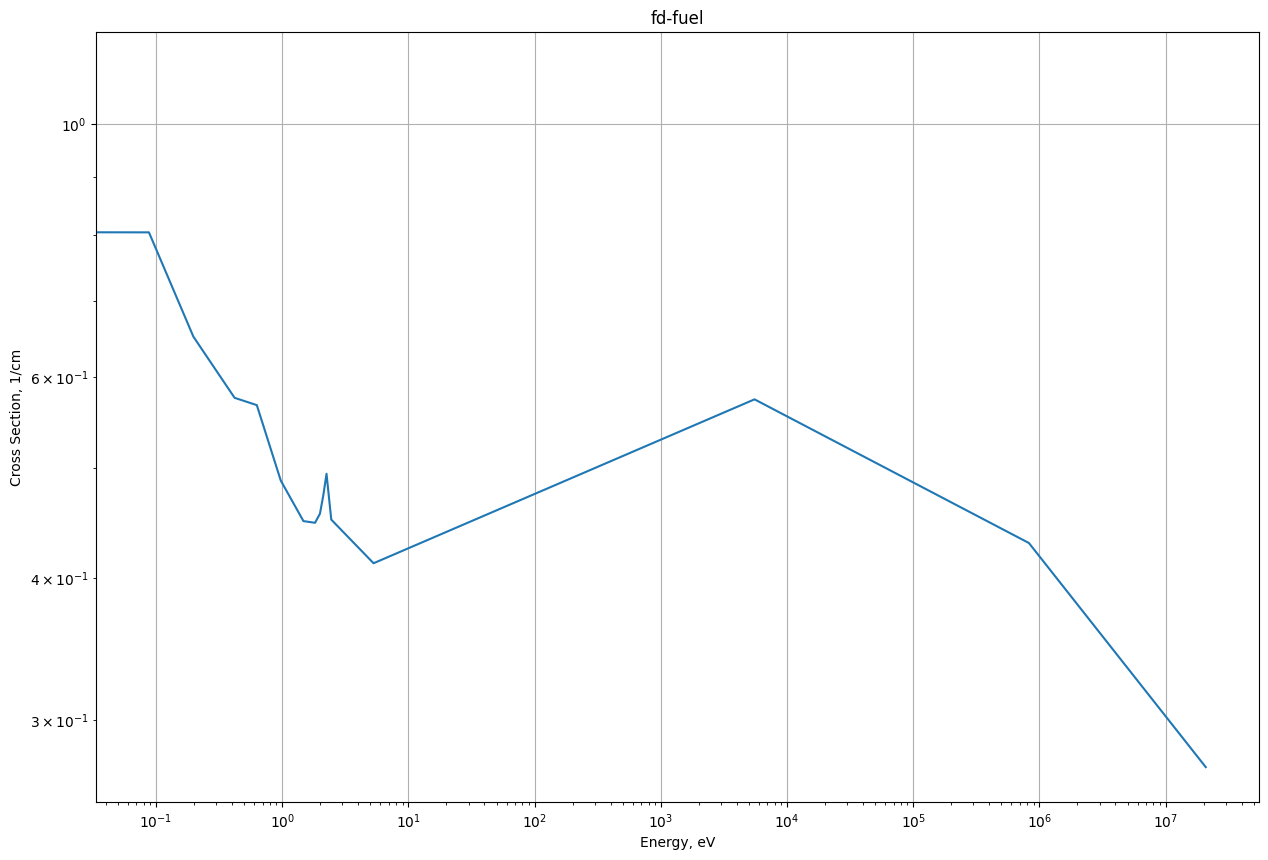

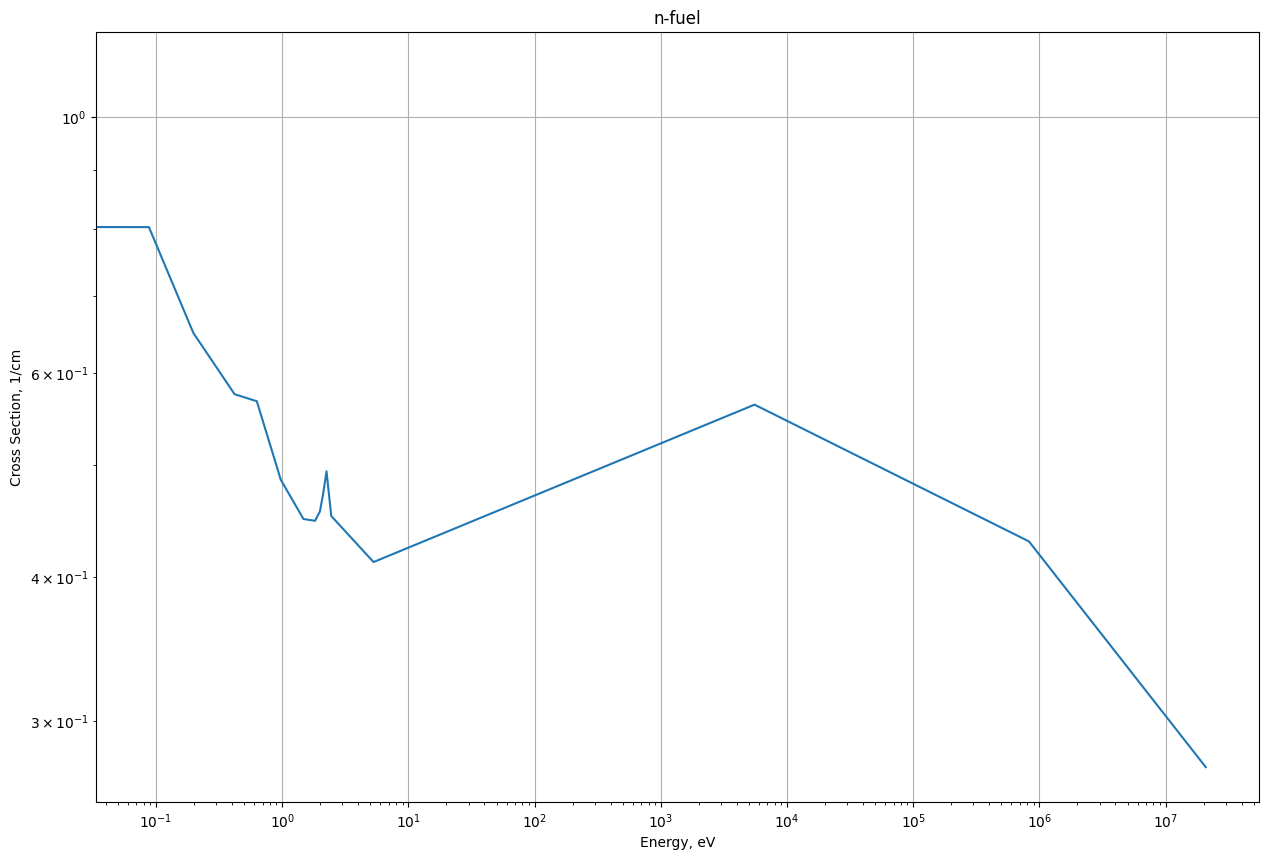

ENERGY GROUP: mgxs_2b_one_eighth_XMAS-172.h5


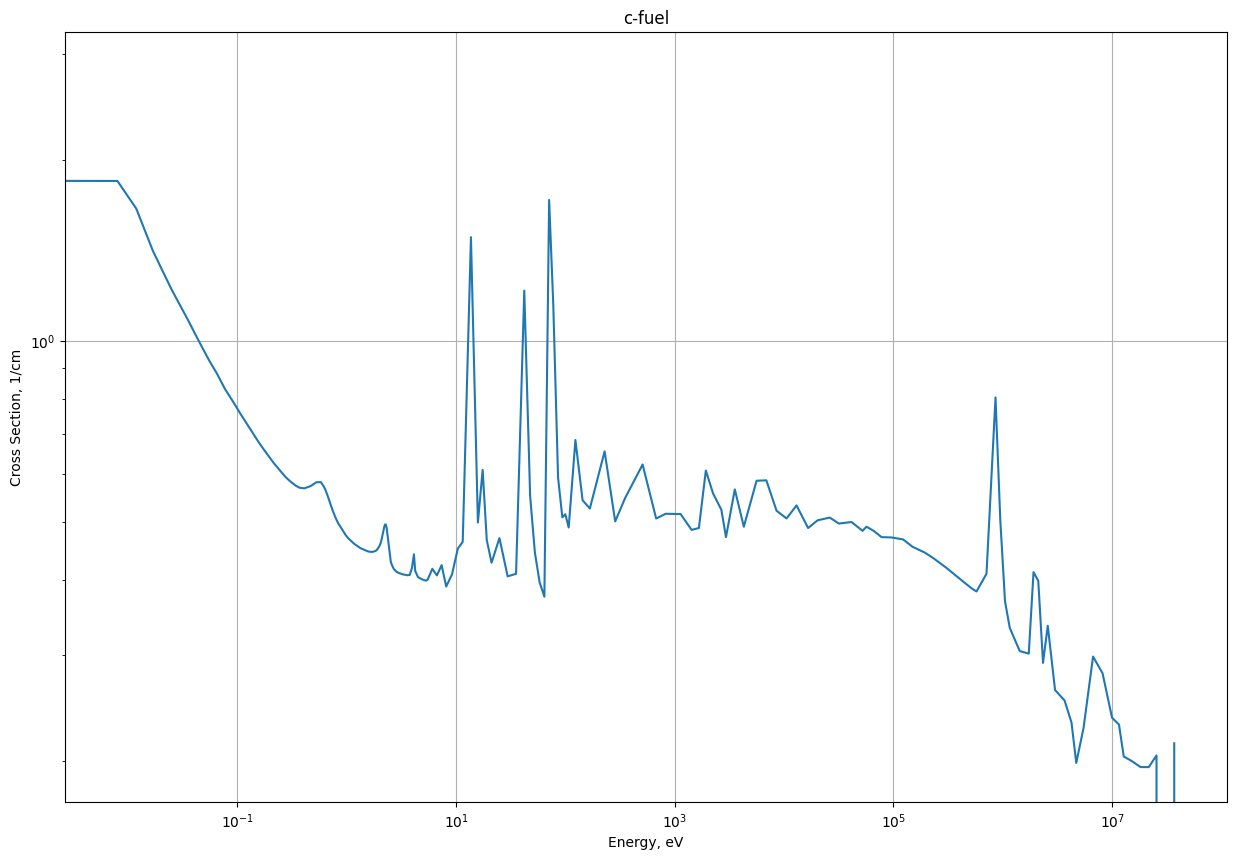

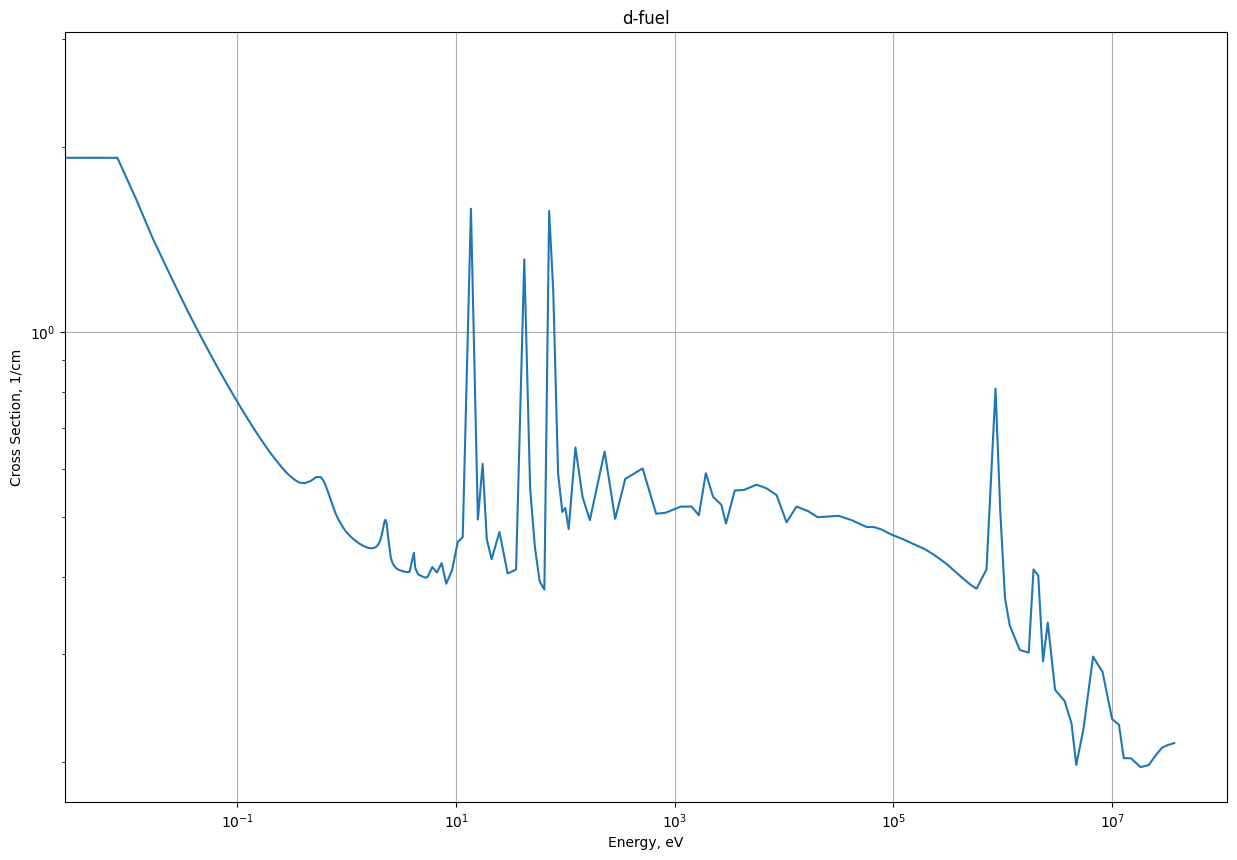

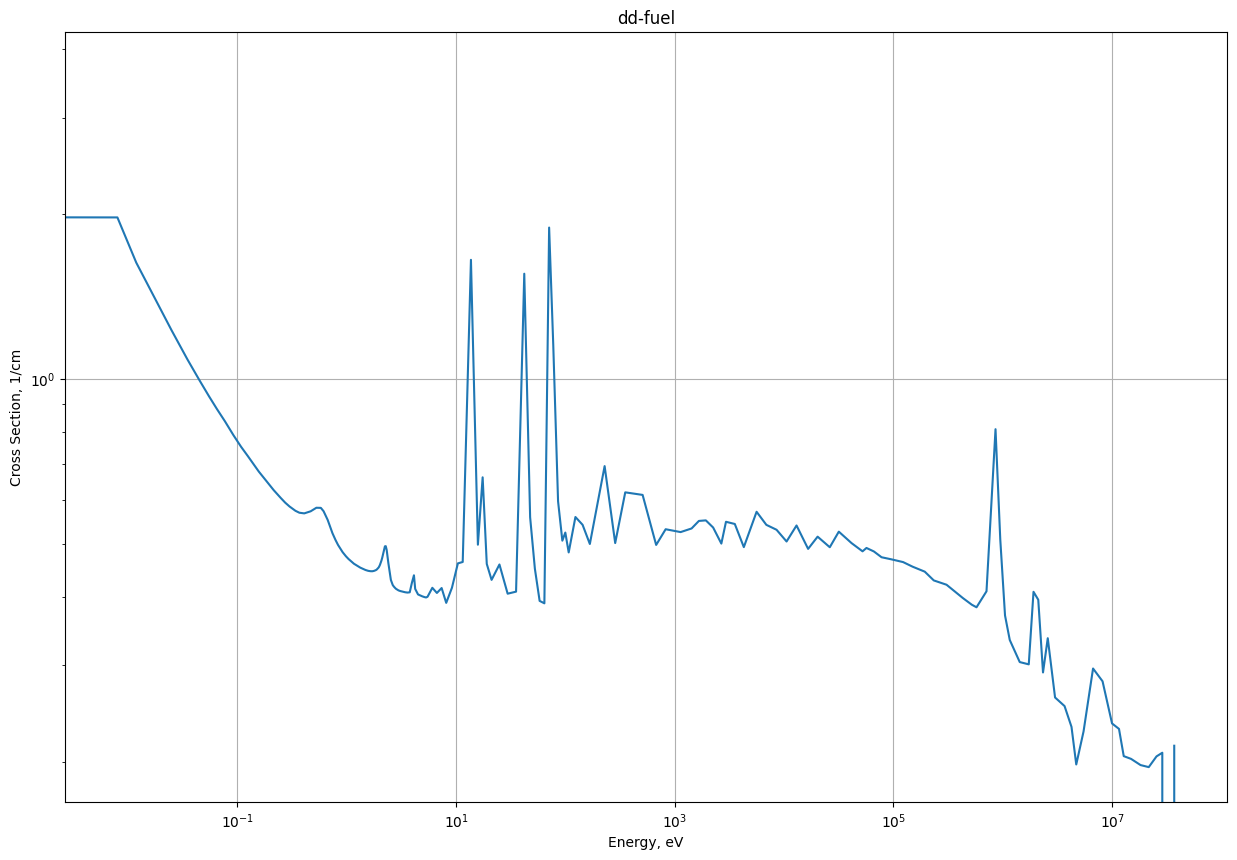

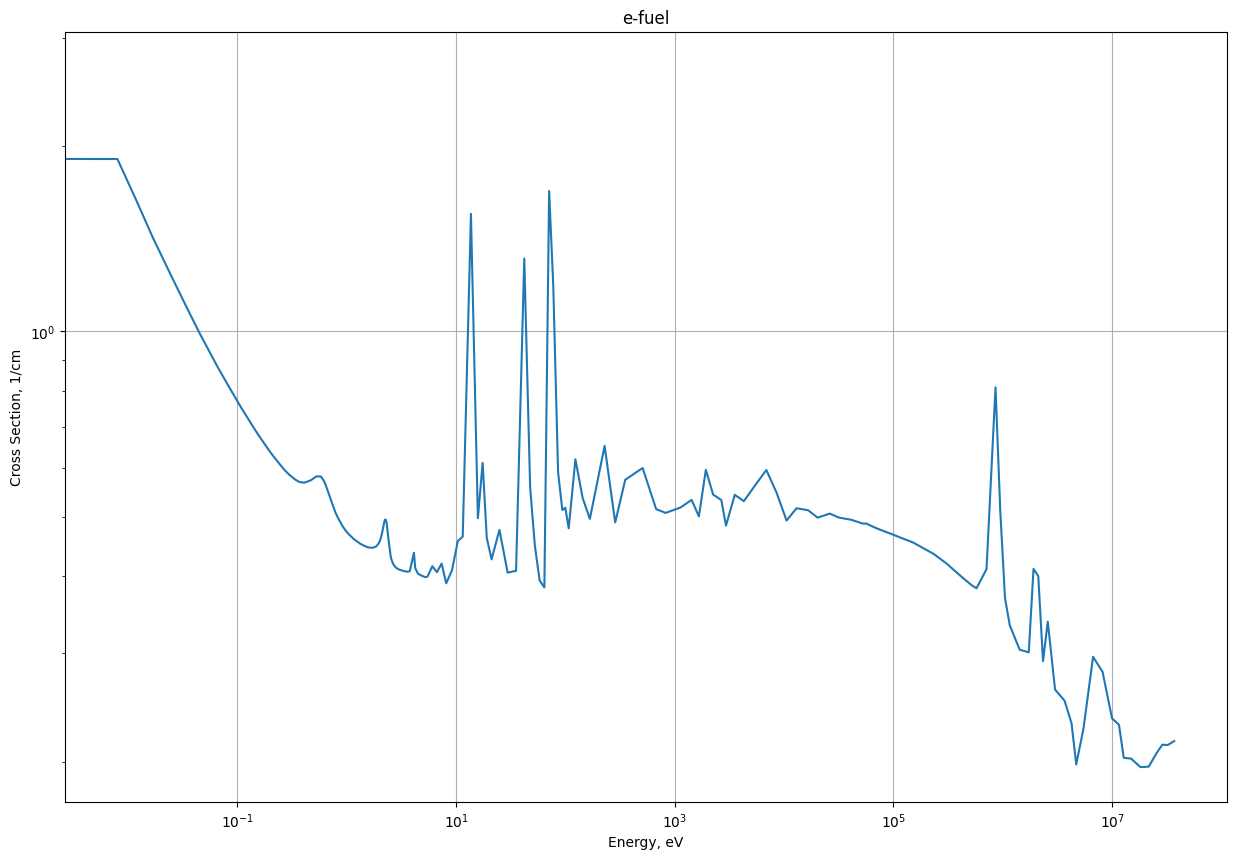

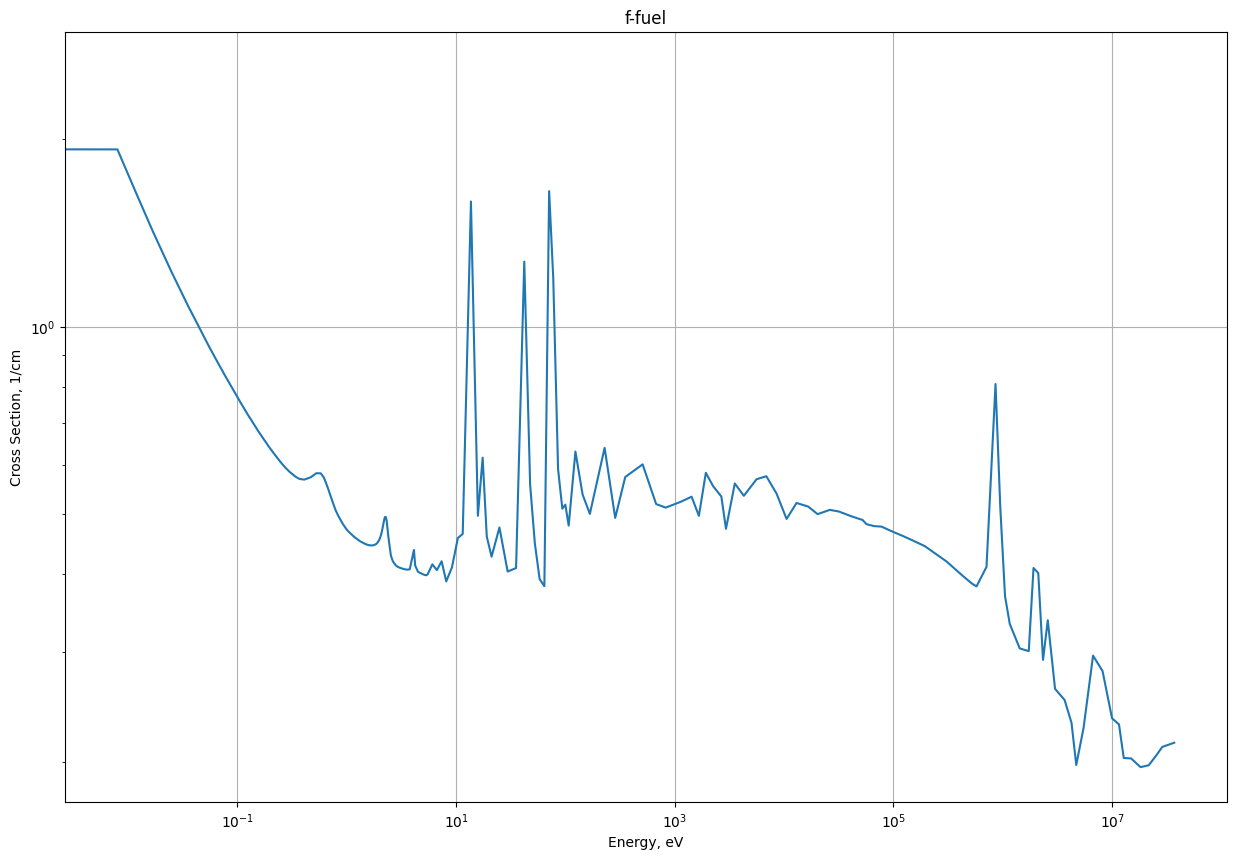

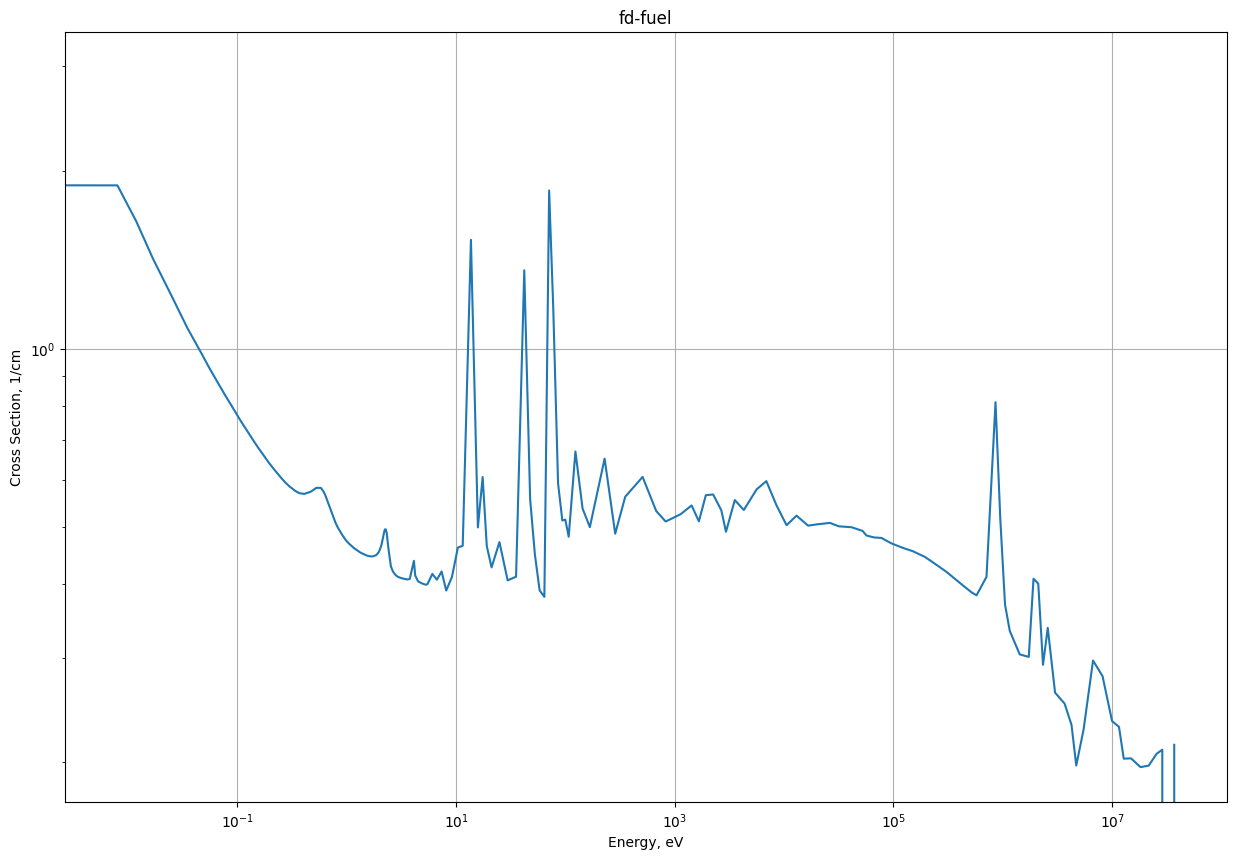

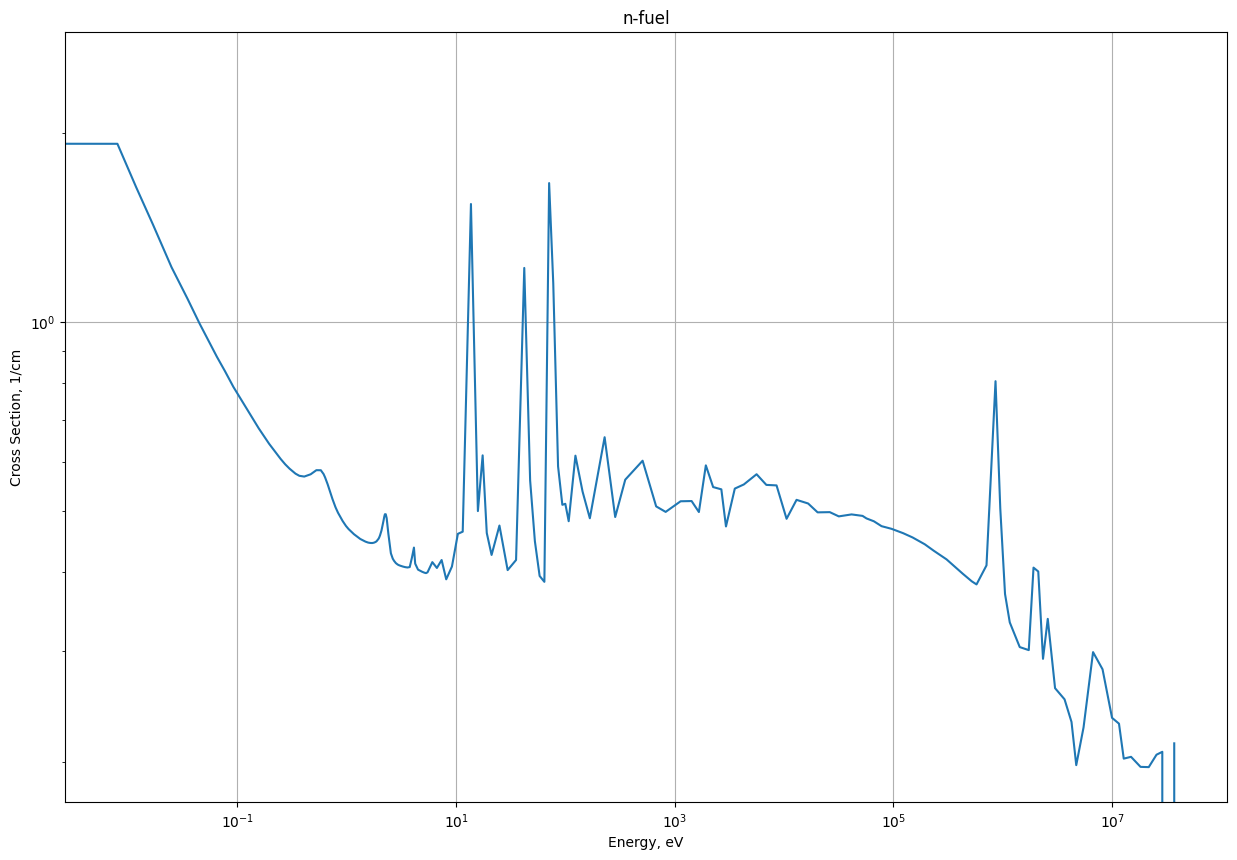

ENERGY GROUP: mgxs_2b_one_eighth_SHEM-361.h5


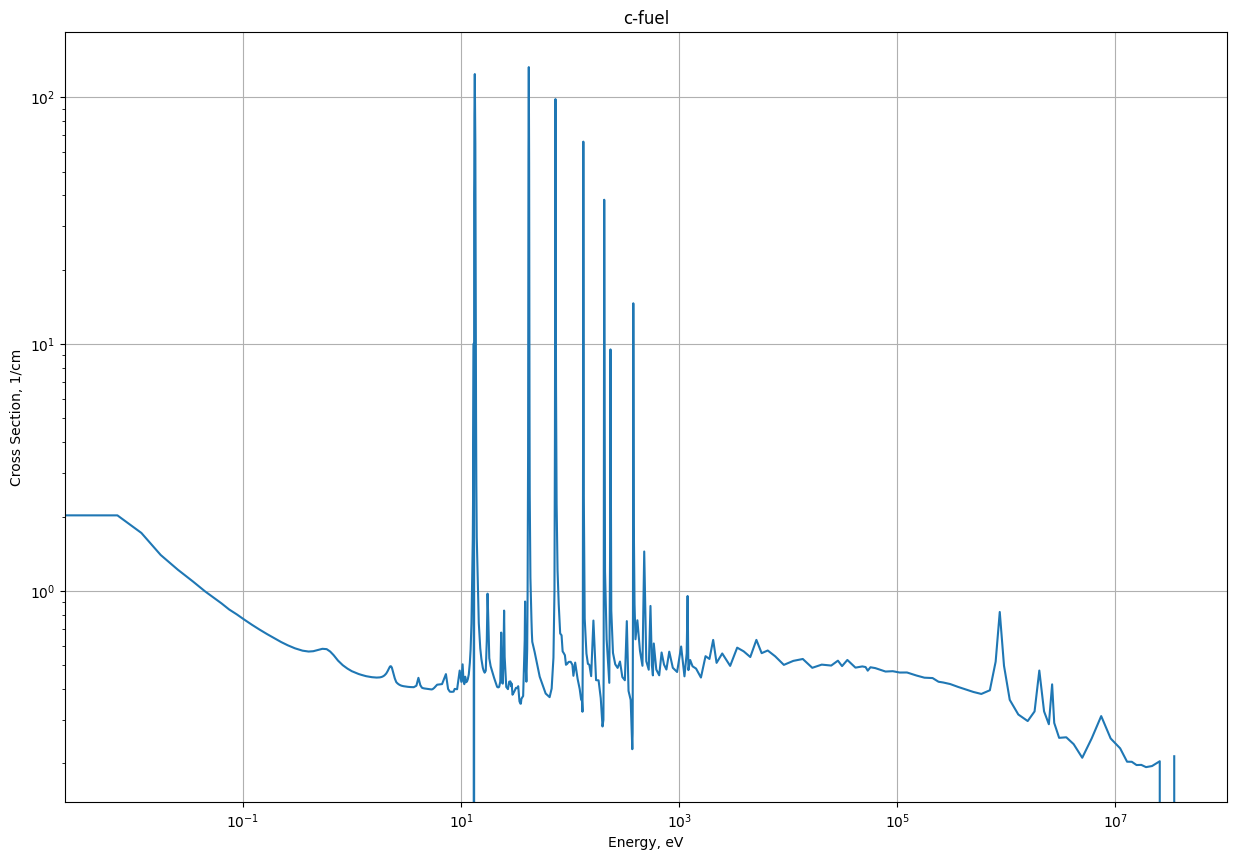

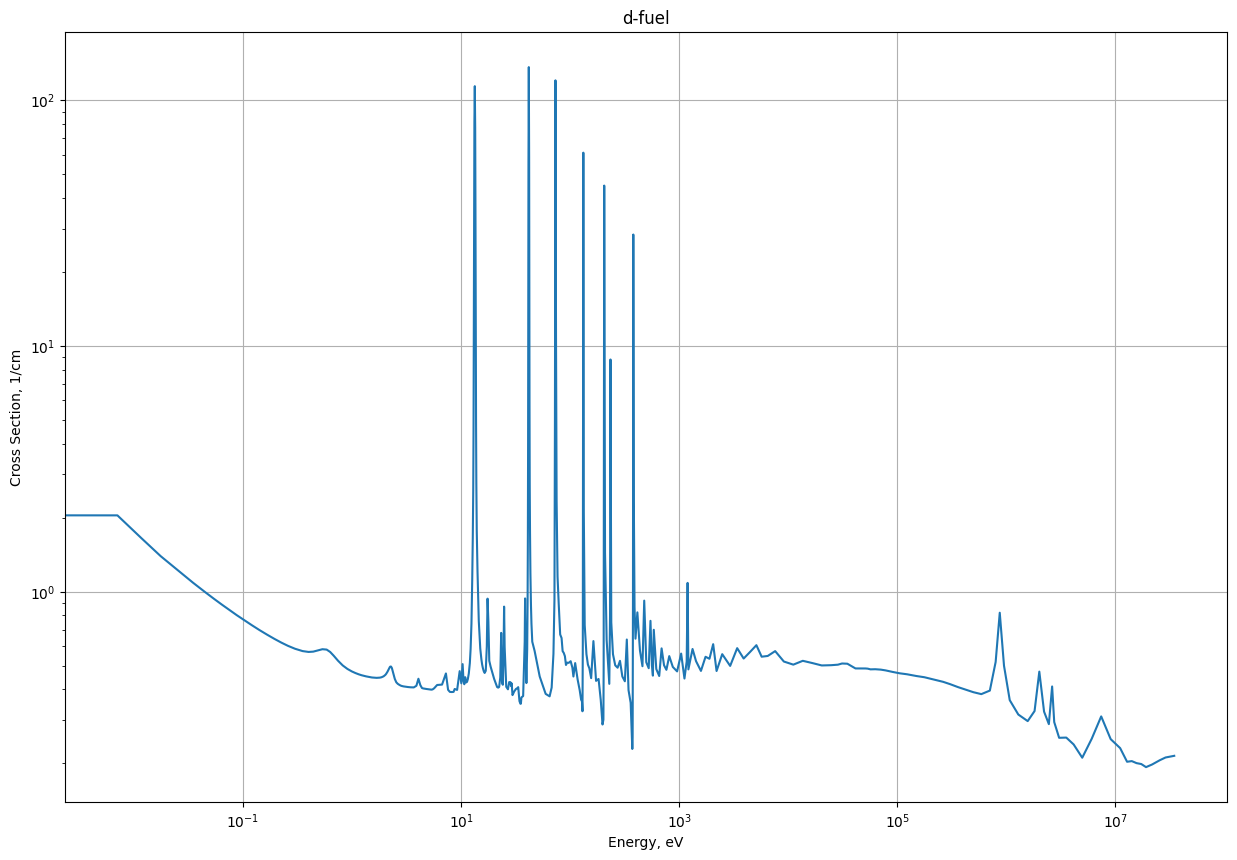

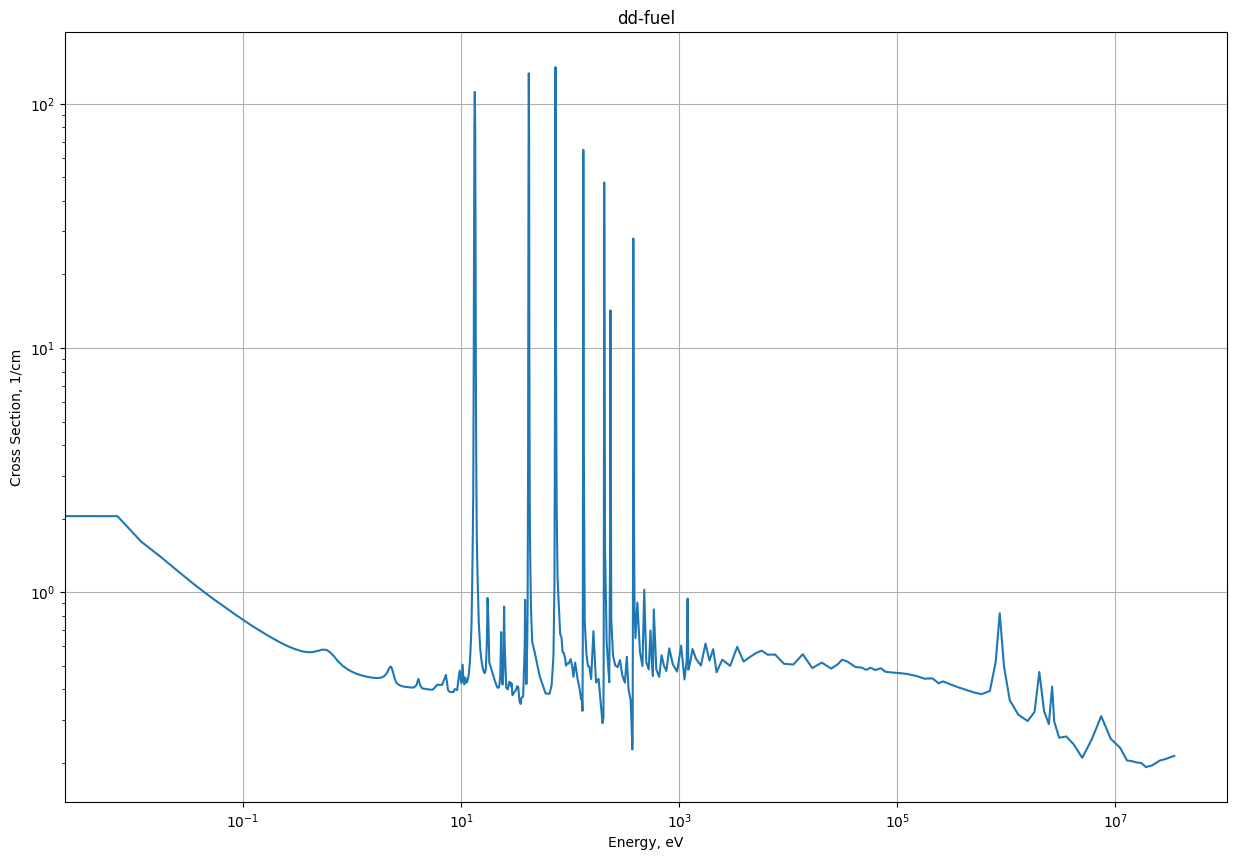

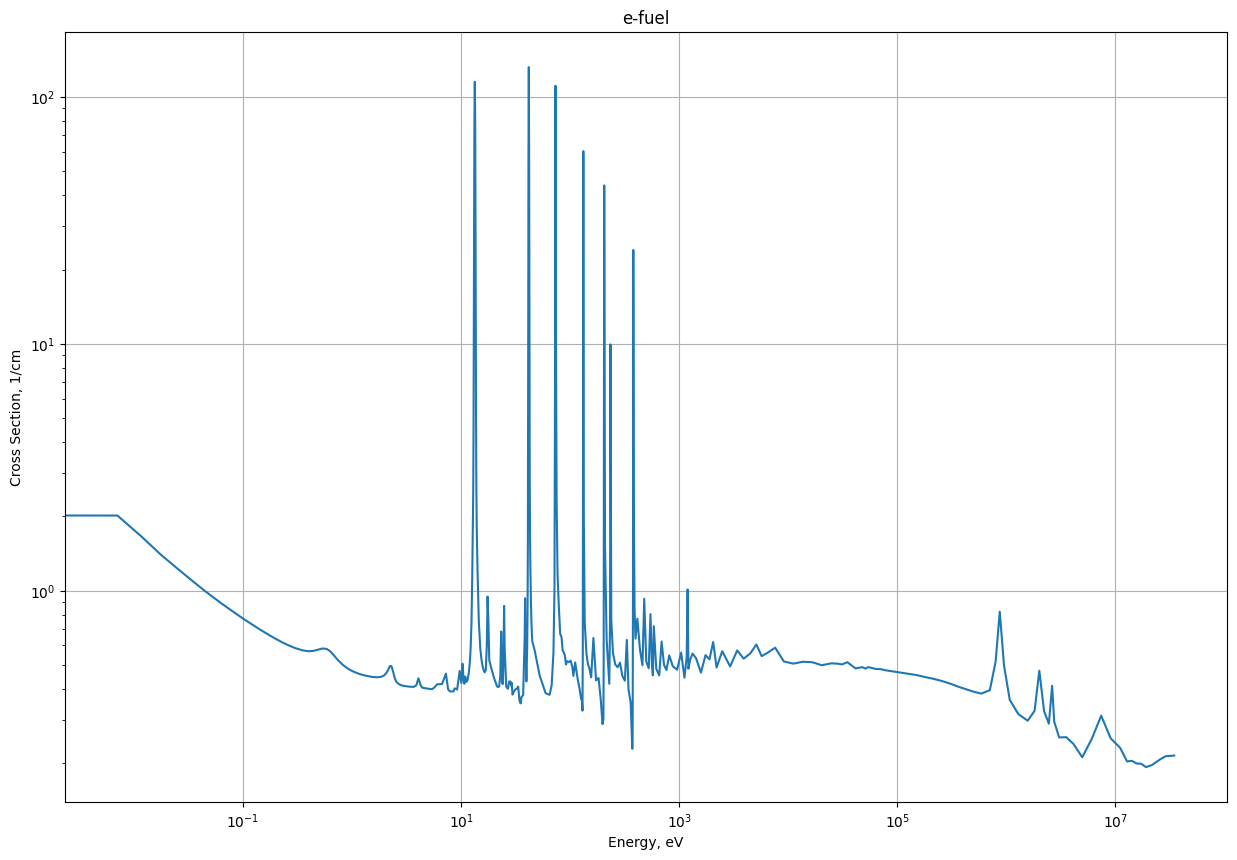

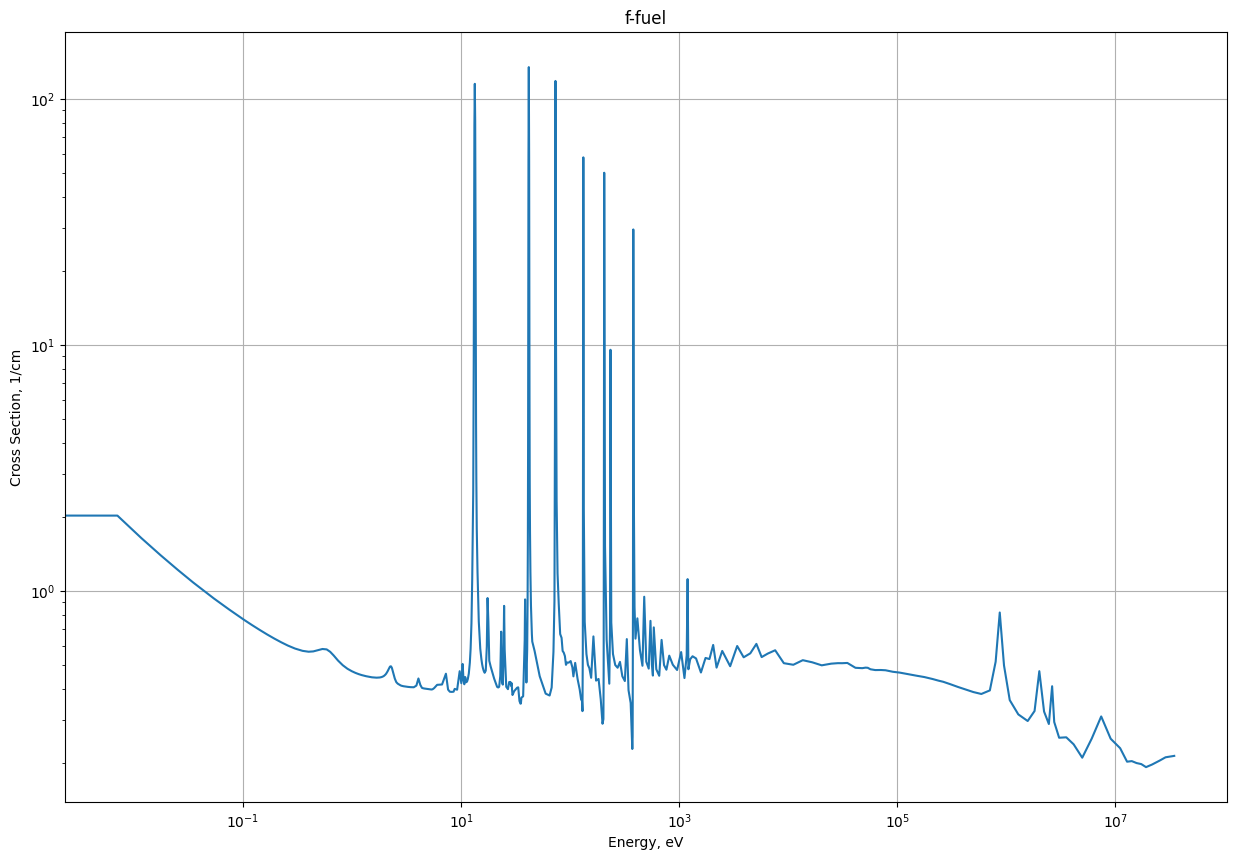

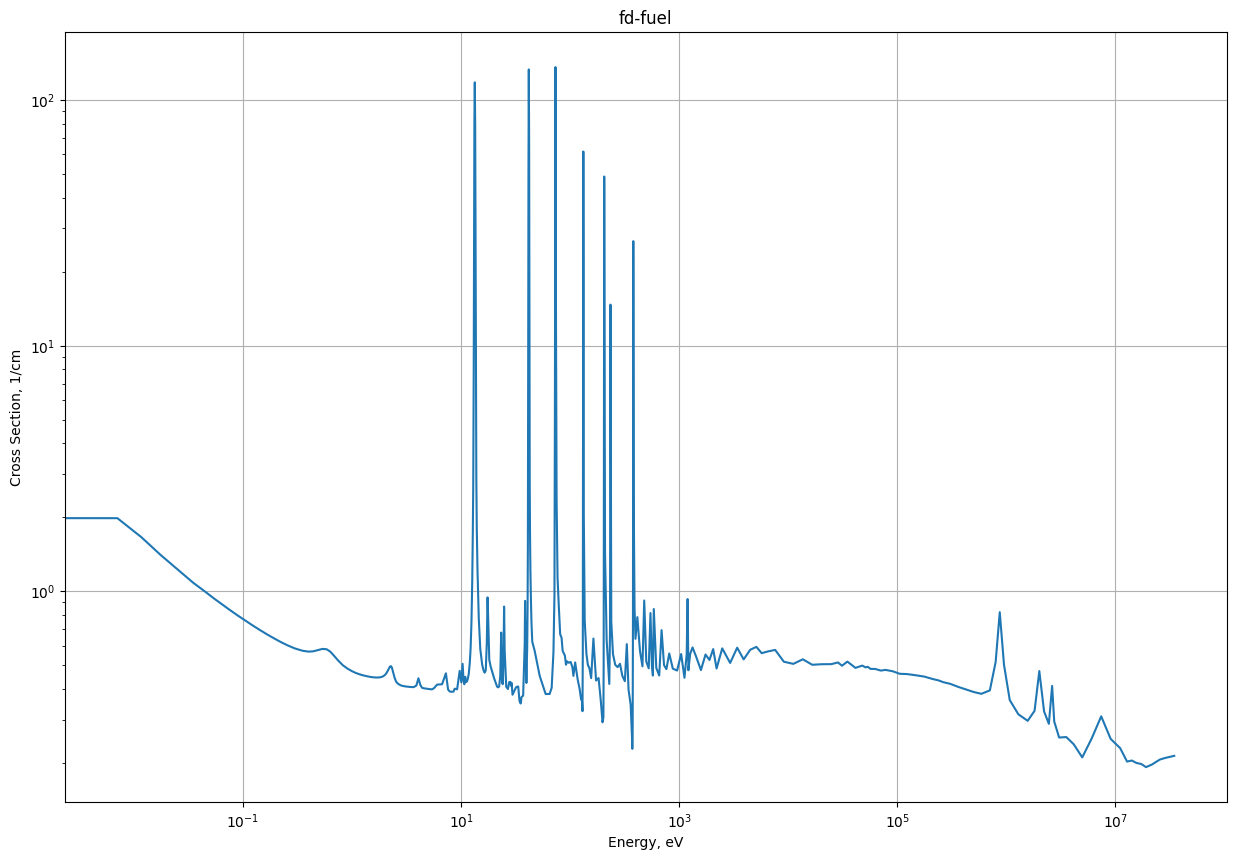

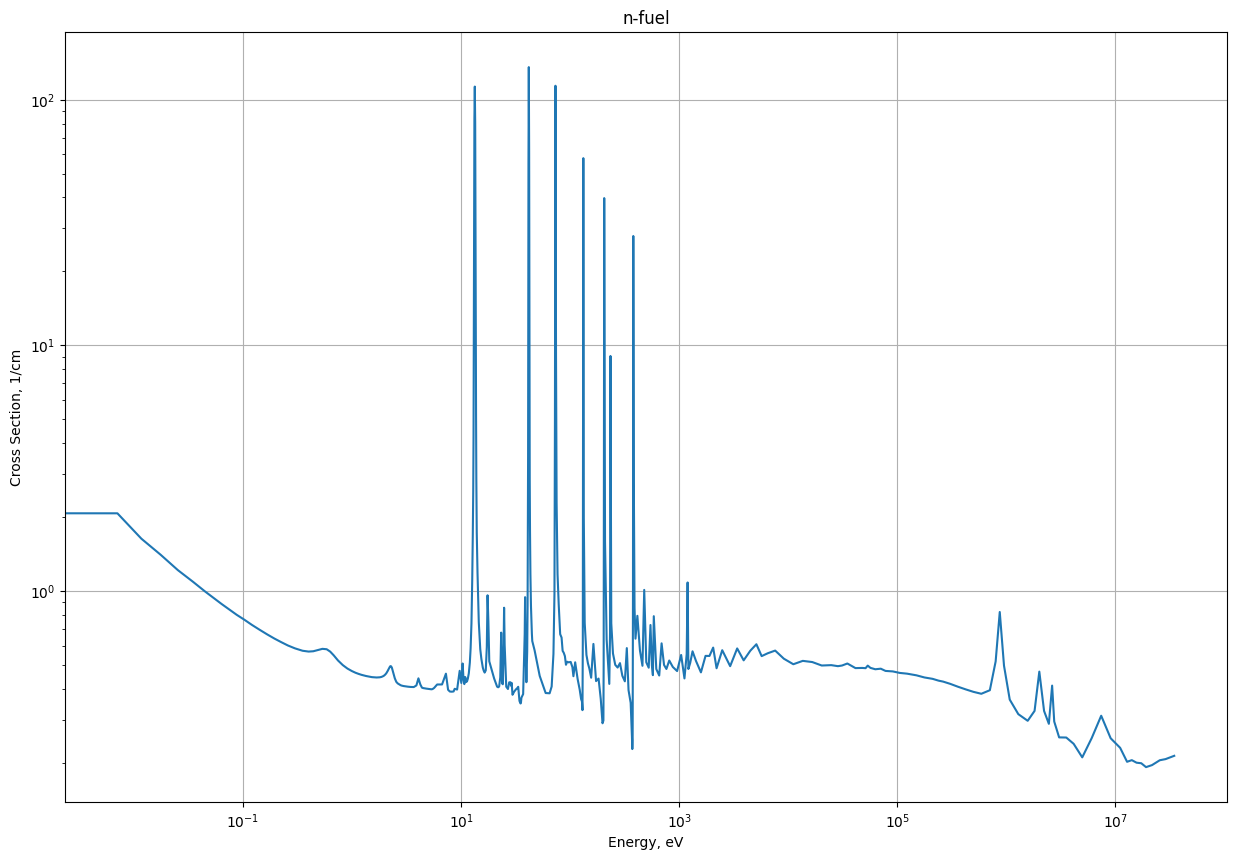

In [3]:
for folder in directory:
    xs_dict[folder]={}
    print("FAMILY:",folder+"\n")
    for filename in os.listdir(folder):
        if ".h5" in filename:
            print("ENERGY GROUP:",filename)
            filepath = folder+"/"+filename
            xs_dict[folder][filename]=hdf5_to_dict(filepath, with_attributes=True)
            energy_groups = xs_dict[folder][filename]['attributes']['group structure']
            energy_mids = np.zeros(energy_groups.shape[0]-1)
            for i in range(1,energy_mids.shape[0]):
                energy_mids[i] = (energy_groups[i+1] + energy_groups[i])
            for key in xs_dict[folder][filename].keys():
                if ("fuel" in key) and ("clad" not in key) and ("gap" not in key):
                    plt.figure(figsize=(15,10))
                    plt.loglog(energy_mids, xs_dict[folder][filename][key]["294K"]["total"][::-1])
                    plt.title(key)
                    plt.xlabel('Energy, eV')
                    plt.ylabel('Cross Section, 1/cm')
                    plt.grid(True)
                    plt.show()

                    


In [4]:
for key in xs_dict.keys():
    print("Folder:",key,"\nFiles:",xs_dict[key].keys())

Folder: mgxs_casl_2b_1fam 
Files: dict_keys(['mgxs_2b_one_eighth_CASMO-70.h5', 'mgxs_2b_one_eighth_CASMO-16.h5', 'mgxs_2b_one_eighth_XMAS-172.h5', 'mgxs_2b_one_eighth_SHEM-361.h5'])
Folder: mgxs_casl_2b_7fam 
Files: dict_keys(['mgxs_2b_one_eighth_CASMO-70.h5', 'mgxs_2b_one_eighth_CASMO-16.h5', 'mgxs_2b_one_eighth_XMAS-172.h5', 'mgxs_2b_one_eighth_SHEM-361.h5'])
